In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv(r"D:\Jupyter\Classification\Datasets\Titanic\train.csv")
test = pd.read_csv(r"D:\Jupyter\Classification\Datasets\Titanic\test.csv")
tr = train.copy()
te = test.copy()
print("train : "+str(tr.shape))
print("test : "+str(te.shape))
train.head()

train : (891, 12)
test : (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA and Data manipulation

In [3]:
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#dropping the column Cabin because most of the values are null.
#dropping PassengerId and ticket
tr = tr.drop(['PassengerId' , 'Cabin' , 'Ticket'] , axis=1)

In [5]:
#Handling null values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
tr['Age'] = imp.fit_transform(tr[['Age']])
tr['Age'].isnull().sum()

0

In [6]:
si =  SimpleImputer(strategy="most_frequent")
tr['Embarked'] = si.fit_transform(tr[['Embarked']])
tr['Embarked'].isnull().sum()

0

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
#Dropping Name
tr = tr.drop('Name' , axis=1)
tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Creating a new variable Minor
tr['Minor'] = np.where(tr['Age']<12 ,1,0)

In [10]:
#Creating a new variable Alone
tr['Alone'] = np.where(tr['SibSp']+tr['Parch']==0 , 1 ,0)
tr = tr.drop(['SibSp' , 'Parch'] , axis=1)

In [11]:
#Creating Dummies
tr = pd.get_dummies(tr , columns=['Pclass' , 'Sex' , 'Minor'  , 'Embarked'])

In [12]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Alone       891 non-null    int32  
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   Pclass_3    891 non-null    uint8  
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Minor_0     891 non-null    uint8  
 10  Minor_1     891 non-null    uint8  
 11  Embarked_C  891 non-null    uint8  
 12  Embarked_Q  891 non-null    uint8  
 13  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(1), uint8(10)
memory usage: 33.2 KB


In [13]:
X_tr = tr.drop('Survived' , axis=1)
y_tr = tr['Survived']

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X_tr , y_tr, test_size=0.2 , random_state=23)

### Model Selection

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)
dtc.score(X_val , y_val)

0.7932960893854749

In [16]:
from sklearn.metrics import confusion_matrix , classification_report , precision_score , recall_score
y_pred = dtc.predict(X_val)
conf = confusion_matrix(y_val , y_pred)
conf

array([[98, 17],
       [20, 44]], dtype=int64)

In [17]:
print("Precision : " + str(precision_score(y_val , y_pred)))
print("Recall : " + str(recall_score(y_val , y_pred)))

Precision : 0.7213114754098361
Recall : 0.6875


In [18]:
cl_re = classification_report(y_val , y_pred)
print(cl_re)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       115
           1       0.72      0.69      0.70        64

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [19]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val , y_pred)
auc

0.7698369565217391

In [20]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,4,5,6,7,8] , 'max_features':[2,3,4,5,6,7,8,9]}
gr = GridSearchCV(dtc , param_grid=params , cv=5 , scoring="accuracy" , return_train_score=True)
gr.fit(X_tr , y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='accuracy')

In [21]:
gr.best_params_

{'max_depth': 5, 'max_features': 6}

In [22]:
dtc1 = gr.best_estimator_
dtc1.fit(X_tr , y_tr)
dtc1.score(X_val , y_val)

0.8156424581005587

In [23]:
y_pred1 = dtc1.predict(X_val)
conf1 = confusion_matrix(y_val , y_pred1)
conf1

array([[103,  12],
       [ 21,  43]], dtype=int64)

In [24]:
print("Precision : " + str(precision_score(y_val , y_pred1)))
print("Recall : " + str(recall_score(y_val , y_pred1)))

Precision : 0.7818181818181819
Recall : 0.671875


In [25]:
auc1 = roc_auc_score(y_val , y_pred1)
auc1

0.7837635869565218

In [26]:
from sklearn.metrics import roc_curve

In [27]:
fpr , tpr , threshold = roc_curve(y_val , y_pred)
fpr1 , tpr1 , threshold1 = roc_curve(y_val , y_pred1)

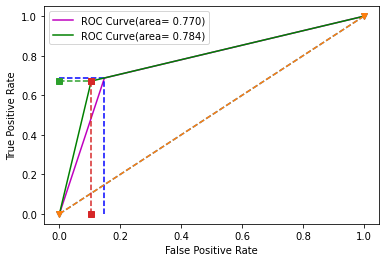

In [28]:
idx = np.argmax(tpr-fpr)
idx1 = np.argmax(tpr1-fpr1)
plt.plot(fpr,tpr , 'm-' , label="ROC Curve(area=% 0.3f)"% auc)
plt.plot([0,1] , [0,1] , 'v--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'b--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'b--')
plt.plot(fpr1,tpr1 , 'g-' , label="ROC Curve(area=% 0.3f)"% auc1)
plt.plot([0,1] , [0,1] , 'v--')
plt.plot([0,fpr1[idx1]], [tpr1[idx1],tpr1[idx1]], 's--')
plt.plot([fpr1[idx1],fpr1[idx1]], [0,tpr1[idx1]], 's--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Final Prediction


In [29]:
te.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
te = te.drop(['PassengerId' , 'Cabin' , 'Ticket'] , axis=1)
imp = SimpleImputer(strategy="median")
te['Age'] = imp.fit_transform(te[['Age']])
te['Fare'] = imp.fit_transform(te[['Fare']])
print(te['Age'].isnull().sum())
print(te['Fare'].isnull().sum())

0
0


In [31]:
te = te.drop('Name' , axis=1)

In [32]:
te['Minor'] = np.where(te['Age']<12 ,1,0)
te['Alone'] = np.where(te['SibSp']+te['Parch']==0 , 1 ,0)
te = te.drop(['SibSp' , 'Parch'] , axis=1)

In [33]:
te = pd.get_dummies(te , columns=['Pclass' , 'Sex' , 'Minor' , 'Embarked'])
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Fare        418 non-null    float64
 2   Alone       418 non-null    int32  
 3   Pclass_1    418 non-null    uint8  
 4   Pclass_2    418 non-null    uint8  
 5   Pclass_3    418 non-null    uint8  
 6   Sex_female  418 non-null    uint8  
 7   Sex_male    418 non-null    uint8  
 8   Minor_0     418 non-null    uint8  
 9   Minor_1     418 non-null    uint8  
 10  Embarked_C  418 non-null    uint8  
 11  Embarked_Q  418 non-null    uint8  
 12  Embarked_S  418 non-null    uint8  
dtypes: float64(2), int32(1), uint8(10)
memory usage: 12.4 KB


In [34]:
final = dtc1.predict(te)

In [39]:
sol = pd.DataFrame()
sol['PassengerId'] = test['PassengerId']
sol['Survived'] = final

In [40]:
sol.to_csv(r"D:\Jupyter\Classification\Datasets\Titanic\Submission.csv" , index=False)